# Support Vector Machines

In this section of the assignment, you will get to implement Support Vector Machines which are among the best (and many believe are indeed the best)“off-the-shelf” supervised learning algorithm.

This section is further divided into 3 subsections.


*   In the first subsection, you will work on a synthetic dataset and visualize the boundary predicted by SVM. You will also vary the value of C-parameter and see how the decision boundary changes. **Please note that you cannot use inbuilt sklearn function for SVM in this sub-section**. You can only use a QCQP (Quadratically Constrained Quadratic Program) solver like CVXPY. 

  References which you may find helpful for this subsection: 
  
  1.   https://www.cvxpy.org/
  2.   https://www.cvxpy.org/examples/basic/quadratic_program.html

  Note that in this section you are expected to show how you derived the Quadratically Constrained form(which can be passed into the solver) from the basic principles of SVM algorithm
*  In the next subsection you will use be using the famous MNIST dataset to explore various kernels and report the results. **Please note you may use inbuilt sklearn SVM functions in this subsection**


In [ ]:
!pip install numpy
!pip install matplotlib
!pip install cvxpy
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

### Subsection 1

In [ ]:
# Feel free to use this helper function to visualize 2D points X with labels +1 or -1
def plot_points(X, Y):
    reds = []
    blues = []
    for i in range(Y.shape[0]):
        if Y[i] == 1:
            reds.append(X[i])
        else:
            blues.append(X[i])
    reds = np.array(reds)
    blues = np.array(blues)
    plt.scatter(reds[:, 0], reds[:, 1], c = 'r')
    plt.scatter(blues[:, 0], blues[:, 1], c = 'b')

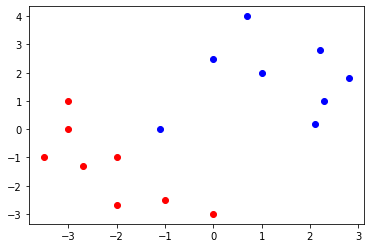

In [ ]:
# Create Synthetic Data and visualize the points
X = np.array([[-3.5, -1], [-3, 0], [-3, 1], [-2.7, -1.3], [-2, -1], [-2, -2.7], 
              [-1, -2.5], [0, -3], [-1.1, 0], [0, 2.5], [1, 2], [0.7, 4], 
              [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8]])
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1])

plot_points(X, y)
plt.show()

In the next cell you are required to derive the Quadratic Constrained Quadratic form of SVM **without soft constraints** from the basic principles. Start with the idea that SVM tries to maximize the margin and then derive the form which you can feed to the solver.

Please print the values of w, b. 

**Note: You are also required to upload a page of the derivation. You may also type it in markdown here**

**Note: You cannot use sklearn SVM functions here**

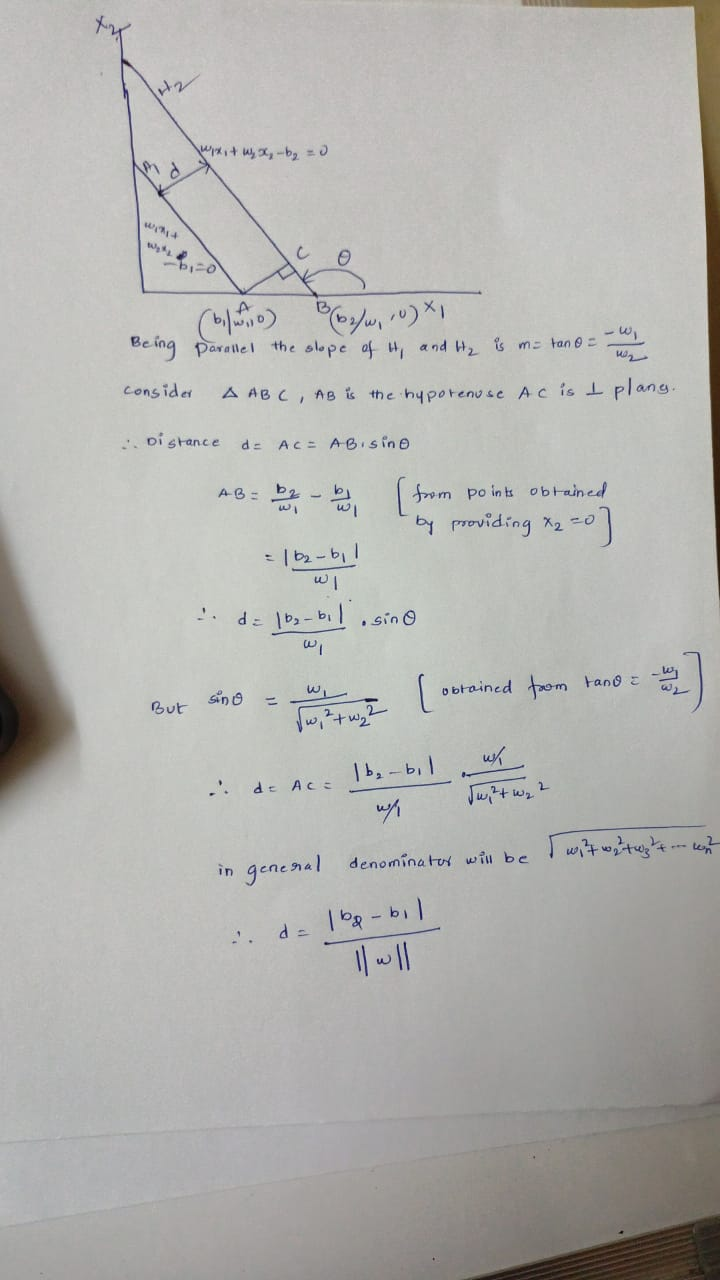

## Derivation:


1.   SVM assumes the data to be linearly seperable.
2.   There may be several number of hyper planes that seperate tha data.
3.   But we assumes the misclassification to be minimum
4.   Let the equation of the hyper plane be w.T*X+b=0
5.   w is the normal to the hyper plane
6.   Main objective is $argmax_{W,b}$ $Y_i$(W.T*$X_i + b$)$\geq$1 $\forall i$ 
7.   Support vector considers two hyper planes $\pi^{-}:W.T*X+b^{-}=0$ and $\pi^{+}:W.T*X+b^{+}=0$ and tries to maximise the `margin` (distance) between them while keeping the miscalssification error minimum.
8.   Let us consider two points $X_{-}\;\; and\;\; X_{+}$  such that  $\pi^{-}:W.T*X_{-}+b^{-}=0$ and $\pi^{+}:W.T*X_{+}+b^{+}=0$. These points are called support vectors.
9.   Now we substitute those points in out original hyperplane `(decision boundary)` we will get some distance $ k \; \; and \;\; k^{'} \; i.e \; W.T*X_{+}+b=k\;\; and \;\;  W.T*X_{-}+b=\;k^{'}\;. Subtract\; the\; two\; equations\;\;. We \;will\; get\; (X_{+}-X_{-})=(k-k^{'})/||W||. usually\; k^{'}=-k\; and \; k=k. To\; avoid\; confusion \;people\; take \;them\; as \;1,-1. So, \;the\; problem\; is\; now \;reduced\; to \;`maximising \;the \;margin`$.
10.  Objective functions $\;argmax_{W,b}\; 2/||W||\; or\; 2K//||W||$.
11. There are two formulation (i)we can keep the `||W|| = 1 and maximise the margin.`
12. (ii) Another option is minimise the `||W|| i.e is 1/2*W.T*W` by keeping the `h(X)=W.T*X+b>=1`. 
13. We will use the second formulation since that can be solved by many QCQP solvers subjected to some constraints

$$ Thus\; our \;final\; formulation \; is Minimize\; ||W||/2 \; subject \; to\; \;y_i*(W.T*X_i+b)\geq1 \; \forall i. \;This\; is \; a \; hard\; margin\; classification $$

14. Soft margin classification allows some margin of error that is it allows few of the points to lie on the opposite side of the suport vectors. To achieve this we add slack variable $\zeta$ 
$$ The\;\; new \;\; constaints\;\; are \;y_i*(W.T*X_i+b)\geq1 - \zeta_i\;\;\; ; \; \zeta_i\geq 0\;\; \forall i $$ 




In [ ]:
# Write your code here
class SVM:

  def __init__(self,mode="hard",c=None):
    self.mode=mode
    self.c=c if c is not None else None
    self.dim=0
    self.no_samples=0
    self.theta=[]
    self.bias=0.0
  

  def _initialise_(self,shape):
    self.theta=cp.Variable((shape,1))
    self.bias=cp.Variable()   # just some scalar variable 

  def fit(self,X,y):   # fit using the Quadratic constrained Quadratic from and cvxpy solvers
    self.dim=X.ndim
    self.no_samples=X.shape[0]

    ## constructing the solver 

    if self.mode=="hard":  

      self._initialise_(X.shape[1])
      a=self.theta
      b=self.bias
      constraints= [y[i]*(a.T@X[i]+b)>=1 for i in range(self.no_samples)]

      obj=cp.Minimize((cp.norm(a,2)**2)/2)

      

      
      prob=cp.Problem(obj,constraints)

      prob.solve()
      print("Problem Status: %s"%prob.status)

      self.theta = a.value
      self.bias = b.value

      print(self.theta)
      print(self.bias)

    if self.mode=="soft":
      
      print(X.shape[1])
      self._initialise_(X.shape[1])
      a=cp.Variable((X.shape[1],1))
      b=cp.Variable()

      n=self.no_samples
      si=cp.Variable(n)
      penalty=self.c

      
      constraint1= [y[i]*(a.T*X[i]+b)>=1-si[i] for i in range(self.no_samples)]
    
      constraint2=[si[i]>=0 for i in range(n)]
      
      #constraints=constraint1+constraint3+constraint2
      constraints=constraint1+constraint2

      obj2=cp.Minimize((cp.norm(a,2)**2/2+penalty*cp.sum(si)))

      prob1=cp.Problem(obj2,constraints)

      prob1.solve()
      print("Problem Status: %s"%prob1.status)

      self.theta = a.value
      self.bias = b.value

      print(self.theta)
      print(self.bias)



In [ ]:

#svm=SVM(mode="soft",c=0.01)
svm=SVM()
svm.fit(X,y)



ECOS 2.0.7 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +0.000e+00  +1.119e+01  +4e+01  7e-01  2e+00  1e+00  2e+00    ---    ---    1  1  - |  -  - 
 1  +7.762e+00  +2.454e+01  +7e+00  7e-01  4e+00  5e+00  4e-01  0.8634  7e-02   1  1  1 |  0  0
 2  +3.483e+00  +6.583e+00  +3e+00  2e-01  1e+00  3e-01  1e-01  0.6528  2e-02   1  1  1 |  0  0
 3  +1.646e+00  +2.540e+00  +1e+00  4e-02  1e-01  3e-01  7e-02  0.7203  2e-01   2  1  1 |  0  0
 4  +2.215e+00  +2.373e+00  +2e-01  6e-03  2e-02  6e-02  1e-02  0.9247  8e-02   2  1  1 |  0  0
 5  +2.328e+00  +2.370e+00  +5e-02  2e-03  6e-03  2e-02  3e-03  0.8507  1e-01   2  1  2 |  0  0
 6  +2.361e+00  +2.363e+00  +2e-03  8e-05  3e-04  6e-04  1e-04  0.9572  1e-04   2  1  1 |  0  0
 7  +2.363e+00  +2.363e+00  +2e-04  6e-06  2e-05  4e-05  9e-06  0.9890  7e-02   2  1  1 |  0  0
 8  +2.363e+00  +2.363e+00  +5e-06  2e-07  6e-

In the next cell you are required to visualize the boundary predicted by the solver. You may want to revise up on how to plot the a line given w, b. Please plot w vector as well as the margin lines

You may want to create a function to plot the line of separation as you would require this frequently in the subsequent parts of the assignment.

In [ ]:
# Write your code here

def f(x, w, b, c=0):  
  """ Y value equation reference:https://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html"""
  return (-w[0] * x - b + c) / w[1]    # returns the y value (W.T*X+b=mx+c)

[[-1.7391304346957444], [-1.304347826208309]]


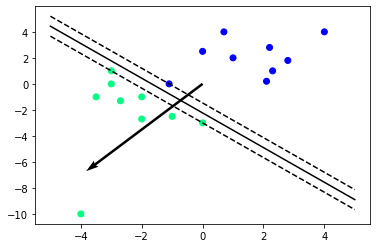

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')
def func_plot(svm_):
  #w.x + b = 0  
  w=svm_.theta
  b=svm_.bias
  a0 = -5; a1 = f(a0, w, b)  
  b0 = 5; b1 = f(b0, w, b)  
  plt.plot([a0,b0], [a1,b1], 'k')

  #w.x + b = 1
  a0 = -5; a1 = f(a0, w, b,1)  
  b0 = 5; b1 = f(b0, w, b,1)  
  plt.plot([a0,b0], [a1,b1], 'k--')

  #w.x + b = -1
  a0 = -5; a1 = f(a0, w, b,-1)  
  b0 = 5; b1 = f(b0, w, b,-1)  
  plt.plot([a0,b0], [a1,b1], 'k--')

  margin = 1 / np.sqrt(np.sum(w** 2))

  yy_down = f(3,w,b,1)
  yy_up = f(3,w,b,-1)

  margin_line=[yy_down,yy_up]

  V = w.tolist()
  print(V)


 
  plt.quiver(0, 0,V[0][0],V[1][0],scale=5 ) 
  #plt.quiver(*origin, V[:,0], V[:,1], color=['r','b'], scale=9)

  plt.show()


func_plot(svm)

In the next cell please plot only the support vectors along with the boundary, w vector, and margins. 

**Note: You are not supposed to hard-code the points here**

[[-1.7391304346957444], [-1.304347826208309]]


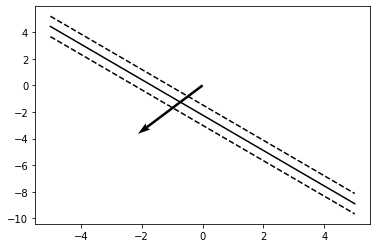

In [ ]:
func_plot(svm)

In the next cell add the following points:
* (-4, -10) with label 1
* (4, 4) with label -1

Is the decision boundary changed after adding the points? Explain your observations theoretically.

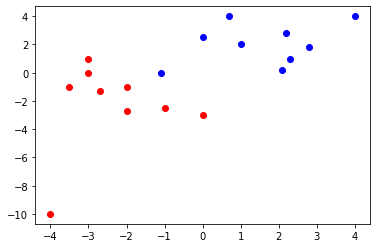

In [ ]:
# Re-create the Synthetic Data by adding the points and visualize the points
add_points=[[-4,-10],[4,4]]
add_label=[1,-1]

X=np.append(X,add_points, axis=0)
y=np.append(y,add_label)

plot_points(X, y)
plt.show()

Problem Status: optimal
[[-1.73913043]
 [-1.30434783]]
-2.913043478291523
[[-1.7391304349218888], [-1.3043478265257467]]


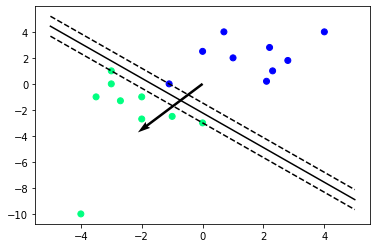

In [ ]:
# Solve for the decision boundary using this modified dataset

#svm=SVM(mode="soft",c=0.01)
svm2=SVM()
svm2.fit(X,y)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')
func_plot(svm2)

### Observation:
 Decision boundary didn't change much on the addition of the new points as they are extreme points on each side of the linearly separable data. So, they don't have any effect on the decision boundary. The decision boundary changes only when the points are nearer to the classifier plane or if they newly formed support vectors

In the next cell you are required to modify your framing of optimisation problem to incorporate soft constraints also known as slack. Plot the decision boundary, w and margin lines for various values of C: $0.01$, $0.1$, $3$, $10$, $100$.

Explain your results theoretically. How does the boundary change with varying values of C? Why?

**Note: Use the modified X and y i.e after adding points in previous cell**

In [ ]:
# Write your code here for C= 0.01


svm3=SVM(mode="soft",c=0.01)

svm3.fit(X,y)



2
Problem Status: optimal
[[-0.22506809]
 [-0.19858949]]
0.013672204267370152


[[-0.22506808755205798], [-0.1985894891685596]]


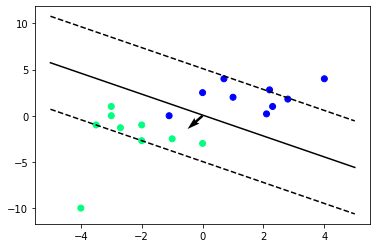

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')
func_plot(svm3)

### Oservation:
Since it is a soft classifier and the penalty is very less which implies it maximises the margin thus allowing some of the points to be on the other side of the support vectors and also some of the points to be misclassified

2
Problem Status: optimal
[[-0.38493724]
 [-0.35146444]]
-0.12133891201898916
[[-0.38493723848405215], [-0.3514644351972508]]


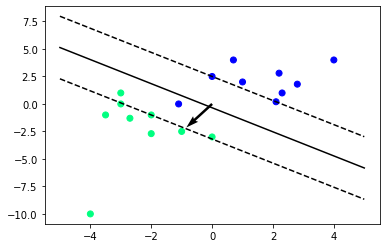

In [ ]:
# Write your code here for C= 0.1
svm4=SVM(mode="soft",c=0.1)

svm4.fit(X,y)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')
func_plot(svm4)

### Observation:
We can see that as c increases the margin is becoming smaller or the model is being bit more on harder side

2
Problem Status: optimal
[[-1.73913043]
 [-1.30434783]]
-2.9130434782869634
[[-1.7391304347882353], [-1.3043478261879213]]


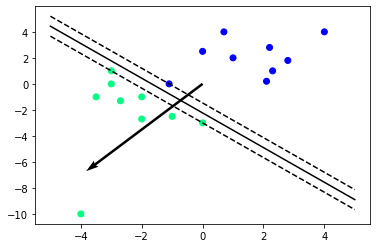

In [ ]:
# Write your code here for C= 3

svm5=SVM(mode="soft",c=3)

svm5.fit(X,y)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')
func_plot(svm5)

2
Problem Status: optimal
[[-1.73913043]
 [-1.30434783]]
-2.9130434783574235
[[-1.7391304348344672], [-1.3043478261281862]]


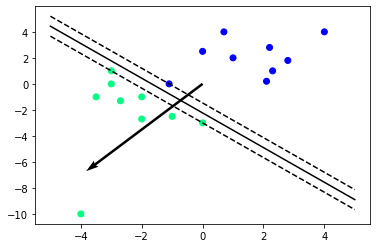

In [ ]:
# Write your code here for C= 10


svm6=SVM(mode="soft",c=10)

svm6.fit(X,y)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')
func_plot(svm6)


2
Problem Status: optimal
[[-1.73913044]
 [-1.30434783]]
-2.9130434786825745
[[-1.7391304350655528], [-1.30434782632928]]


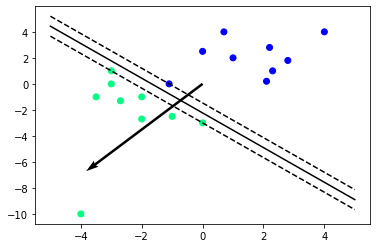

In [ ]:
# Write your code here for C= 100

svm7=SVM(mode="soft",c=100)

svm7.fit(X,y)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')
func_plot(svm7)

### Observation:
For c=10 and for c=100 the margin is very small and the model is very strict as c increases the room for error diminishes slowly 

Take the case of C = 100 and remove the support vectors. Does the boundary change after the deletion?
Explain why? Show your results by appropriate plots?

In [ ]:
# Write your Code here

# we need to remove the points where w.T*x+b=-1 or =1
from numpy.testing import assert_almost_equal

w=svm7.theta
b=svm7.bias

y_pred = (np.dot(X,w)+b).astype(float)

support_vectors=[]
take_indices=[]
epsilon = 1e-8
c=float(-1.0)
d=float(1.0)
print(c,d)
for i,x in enumerate(X):
  
  b=[y_pred[i]][0]
  if abs(b-c)<epsilon or abs(b-d)<epsilon:
    support_vectors.append(x)
  else:
    take_indices.append(i)
 
print(take_indices)


-1.0 1.0
[0, 1, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14, 15, 16, 17]


In [ ]:
X=np.take(X, take_indices, axis=0)
y=np.take(y, take_indices, axis=0)


print(X.shape)
print(y.shape)


(15, 2)
(15,)


2
Problem Status: optimal
[[-0.38493724]
 [-0.35146444]]
-0.12133891214351254
[[-0.3849372385183756], [-0.35146443517329223]]


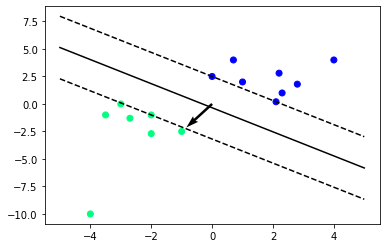

In [ ]:
svm8=SVM(mode="soft",c=100)

svm8.fit(X,y)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')
func_plot(svm8)

## Observation:

1.   It is clear from the above two plots that after removal of the support vectors the margin increased for C=100 thus forming new support vectors.

2.   From the above experiments as C increases the margin decreases. Harder is the classifier 





### Subsection 2

In [ ]:
!pip install python-mnist
!rm -rf samples
!mkdir samples
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz -P samples/
!gunzip samples/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz -P samples/
!gunzip samples/train-labels-idx1-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz -P samples/
!gunzip samples/t10k-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz -P samples/
!gunzip samples/t10k-labels-idx1-ubyte.gz

--2021-03-08 22:56:04--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.21.29.36, 2606:4700:3034::6815:1d24, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘samples/train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  9.17MB/s    in 1.0s    

2021-03-08 22:56:06 (9.17 MB/s) - ‘samples/train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2021-03-08 22:56:06--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.21.29.36, 2606:4700:3034::6815:1d24, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘samples/train-labels-idx1-ubyte.gz’

train-labe

In [ ]:
# Import Relevant Packages
from sklearn.svm import SVC
import numpy as np
from mnist.loader import MNIST

In [ ]:
mndata = MNIST('samples')

# Load training dataset
images, labels = mndata.load_training()
l = len(labels)
images_train = np.array(images)
labels_train = np.array(labels)

print(images_train.shape)
print(labels_train.shape)




(60000, 784)
(60000,)


In [ ]:
# Load testing dataset
images, labels = mndata.load_testing()
l = len(labels)
images_test = np.array(images)
labels_test = np.array(labels)

print(images_test.shape)
print(labels_test.shape)


train_filter = np.where((labels_train == 0 ) | (labels_train == 1) | (labels_train == 2))    #| (labels_train == 3))
test_filter = np.where((labels_test == 0) | (labels_test == 1) | (labels_test == 2))   # | (labels_test == 3))



images_train, labels_train = images_train[train_filter], labels_train[train_filter]
images_test, labels_test = images_test[test_filter], labels_test[test_filter]


print(images_train.shape)
print(labels_train.shape)

print(images_test.shape)
print(labels_test.shape)


(10000, 784)
(10000,)
(18623, 784)
(18623,)
(3147, 784)
(3147,)


- Tweak different parameters like the C Parameter and gamma parameter of the Linear SVM and report the results.
- Experiment different kernels for classification and report the results.

Report accuracy score, F1-score, Confusion matrix and any other metrics you feel useful.

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import seaborn as sns

## Linear kernel

In [ ]:
def accuracy_scores(kernel,labels_pred,c,gamma_):
  print("Model with kernel {} and parameters C = {} and gamma = {} has  f1score:{} ".format(kernel,c,gamma_, f1_score(labels_test, labels_pred, average='weighted')))

  print("")

  print("Model with kernel {} and parameters C = {} and gamma = {} has  accuracy:{} ".format(kernel,c,gamma_, metrics.accuracy_score(y_true=labels_test, y_pred=labels_pred)))

  cm=confusion_matrix(labels_test, labels_pred)

  print(" Confusion Matrix - MODEL: {} c = {} gamma_ = {}".format(kernel,c,gamma_))

  print(cm)

  return cm

In [ ]:
import itertools
c=['0.001','0.01','0.1','1','10','100']
gamma_=['scale','auto']

permute=list(map(','.join, itertools.chain(itertools.product(c, gamma_), itertools.product(c, gamma_))))

print(permute)

def model(kernel_):
  cm=[]
  for param in permute:
    p=param.split(',')

    model_linear = SVC(C=float(p[0]),kernel=kernel_,gamma=p[1])
    model_linear.fit(images_train, labels_train)

    # predict
    labels_pred = model_linear.predict(images_test)
    cm=accuracy_scores(kernel_,labels_pred,p[0],p[1])
  return cm 

['0.001,scale', '0.001,auto', '0.01,scale', '0.01,auto', '0.1,scale', '0.1,auto', '1,scale', '1,auto', '10,scale', '10,auto', '100,scale', '100,auto', '0.001,scale', '0.001,auto', '0.01,scale', '0.01,auto', '0.1,scale', '0.1,auto', '1,scale', '1,auto', '10,scale', '10,auto', '100,scale', '100,auto']


Model with kernel linear and parameters C = 0.001 and gamma = scale has  f1score:0.9808744005867673 

Model with kernel linear and parameters C = 0.001 and gamma = scale has  accuracy:0.9809342230695901 
 Confusion Matrix - MODEL: linear c = 0.001 gamma_ = scale
[[ 971    0    9]
 [   1 1127    7]
 [  24   19  989]]
Model with kernel linear and parameters C = 0.001 and gamma = auto has  f1score:0.9808744005867673 

Model with kernel linear and parameters C = 0.001 and gamma = auto has  accuracy:0.9809342230695901 
 Confusion Matrix - MODEL: linear c = 0.001 gamma_ = auto
[[ 971    0    9]
 [   1 1127    7]
 [  24   19  989]]
Model with kernel linear and parameters C = 0.01 and gamma = scale has  f1score:0.9808744005867673 

Model with kernel linear and parameters C = 0.01 and gamma = scale has  accuracy:0.9809342230695901 
 Confusion Matrix - MODEL: linear c = 0.01 gamma_ = scale
[[ 971    0    9]
 [   1 1127    7]
 [  24   19  989]]
Model with kernel linear and parameters C = 0.01 and

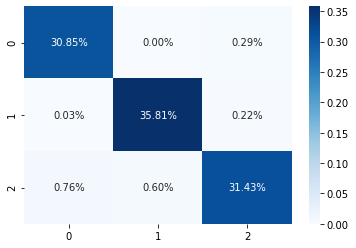

In [ ]:
cm=model('linear')

# confusion matrix for the last combination

sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

### Observation:
We can see from the above observation the accuracy is same for all possible combinations of C and gamma . The model is producing high accuracy of o.98 and o.98 f1 score. Linear kernel is performing well on the data 

## Polynomial Kernel:

Model with kernel poly and parameters C = 0.001 and gamma = scale has  f1score:0.7955386360973828 

Model with kernel poly and parameters C = 0.001 and gamma = scale has  accuracy:0.7959961868446139 
 Confusion Matrix - MODEL: poly c = 0.001 gamma_ = scale
[[ 762  207   11]
 [   0 1134    1]
 [  12  411  609]]
Model with kernel poly and parameters C = 0.001 and gamma = auto has  f1score:0.9939604576985398 

Model with kernel poly and parameters C = 0.001 and gamma = auto has  accuracy:0.9939625039720369 
 Confusion Matrix - MODEL: poly c = 0.001 gamma_ = auto
[[ 976    2    2]
 [   0 1131    4]
 [   8    3 1021]]
Model with kernel poly and parameters C = 0.01 and gamma = scale has  f1score:0.9486352290968783 

Model with kernel poly and parameters C = 0.01 and gamma = scale has  accuracy:0.9485224022878932 
 Confusion Matrix - MODEL: poly c = 0.01 gamma_ = scale
[[ 934   41    5]
 [   0 1129    6]
 [  14   96  922]]
Model with kernel poly and parameters C = 0.01 and gamma = auto has  f

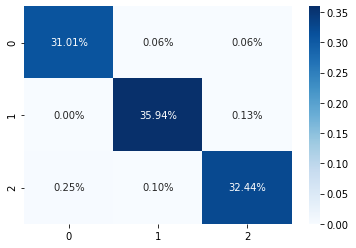

In [ ]:
cm=model("poly")

# confusion matrix for the last combination

sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

### Observations:
As C value increases and gamma= scale the accuracy and f1 score are increasing on the model trained with the polynomial kernel. For higher c with gamma as scale the model is better compared to the linear kernel.

## RBF Kernel:

In [ ]:
cm=model("rbf")

# confusion matrix for the last combination

sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

Model with kernel rbf and parameters C = 0.001 and gamma = scale has  f1score:0.9522909687265174 

Model with kernel rbf and parameters C = 0.001 and gamma = scale has  accuracy:0.9523355576739753 
 Confusion Matrix - MODEL: rbf c = 0.001 gamma_ = scale
[[ 932    1   47]
 [   0 1113   22]
 [  17   63  952]]
Model with kernel rbf and parameters C = 0.001 and gamma = auto has  f1score:0.19119578457245295 

Model with kernel rbf and parameters C = 0.001 and gamma = auto has  accuracy:0.3606609469335875 
 Confusion Matrix - MODEL: rbf c = 0.001 gamma_ = auto
[[   0  980    0]
 [   0 1135    0]
 [   0 1032    0]]
Model with kernel rbf and parameters C = 0.01 and gamma = scale has  f1score:0.9882377716636775 

Model with kernel rbf and parameters C = 0.01 and gamma = scale has  accuracy:0.9882427708929139 
 Confusion Matrix - MODEL: rbf c = 0.01 gamma_ = scale
[[ 974    1    5]
 [   0 1125   10]
 [  15    6 1011]]
Model with kernel rbf and parameters C = 0.01 and gamma = auto has  f1score:0.

### Observations:
In this model where we used the `rbf` kernel the model performs with bad accuracy and f1 score for gamma = `auto` and as the c increases and the gamma=scale the model performed with high accuracy  

## Sigmoid Kernel:

Model with kernel sigmoid and parameters C = 0.001 and gamma = scale has  f1score:0.9233493866375924 

Model with kernel sigmoid and parameters C = 0.001 and gamma = scale has  accuracy:0.925007944073721 
 Confusion Matrix - MODEL: sigmoid c = 0.001 gamma_ = scale
[[ 958    2   20]
 [   0 1130    5]
 [  41  168  823]]
Model with kernel sigmoid and parameters C = 0.001 and gamma = auto has  f1score:0.19119578457245295 

Model with kernel sigmoid and parameters C = 0.001 and gamma = auto has  accuracy:0.3606609469335875 
 Confusion Matrix - MODEL: sigmoid c = 0.001 gamma_ = auto
[[   0  980    0]
 [   0 1135    0]
 [   0 1032    0]]
Model with kernel sigmoid and parameters C = 0.01 and gamma = scale has  f1score:0.9770283616815221 

Model with kernel sigmoid and parameters C = 0.01 and gamma = scale has  accuracy:0.9771210676835081 
 Confusion Matrix - MODEL: sigmoid c = 0.01 gamma_ = scale
[[ 970    1    9]
 [   0 1125   10]
 [  27   25  980]]
Model with kernel sigmoid and parameters C 

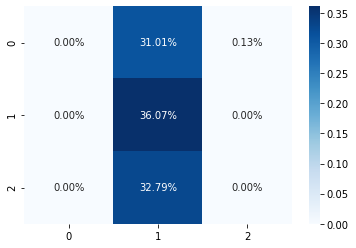

In [ ]:
cm=model("sigmoid")

# confusion matrix for the last combination

sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

### Observation:
This model is also similar to the rbf kernel, it performed well for gamma=scale and for higher c values and the accuracy is not as good as other models as c increases